In [31]:
import pandas as pd
import re

# Path to your log file
log_file = 'grid_double_refined.log'

# Read the file
with open(log_file, 'r') as f:
    lines = f.readlines()

# Define column names based on header in log
columns = [
    "Iter", "dir", "h_norm", "Cost", "New_Cost", 
    "r_norm", "r_new_norm", "D_time", "E_time", "T_time", "Status"
]

# Prepare a list to hold parsed rows
data = []

for line in lines:
    # Skip empty or header lines
    if line.strip().startswith('#') or not line.strip():
        continue

    # Extract values using regex
    match = re.match(
        r"\s*(\d+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)\s+([-+.\deE]+)"
        r"\s+D=([\d.]+)s E=([\d.]+)s T=([\d.]+)s\s+(\w+)", 
        line
    )
    if match:
        data.append([float(match.group(i)) if i != 11 else match.group(i) for i in range(1, 12)])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Example usage
print(df.head())

   Iter       dir   h_norm      Cost  New_Cost   r_norm  r_new_norm  D_time  \
0   3.0 -0.000015  42.5555  0.232016  1.907440  5.83153    30.31760   0.121   
1   4.0 -0.000005  42.4110  0.232016  0.242595  5.83153     5.88510   0.122   
2   5.0 -0.000003  40.0787  0.232016  0.214053  5.83153     5.47098   0.121   
3   6.0 -0.000003  39.9089  0.214053  0.197283  5.47098     5.12399   0.125   
4   7.0 -0.000003  38.5913  0.197283  0.180746  5.12399     5.31459   0.121   

   E_time  T_time    Status  
0   1.691   1.812  REJECTED  
1   1.673   1.796  REJECTED  
2   1.677   1.798  ACCEPTED  
3   1.717   1.842  ACCEPTED  
4   1.674   1.795  ACCEPTED  


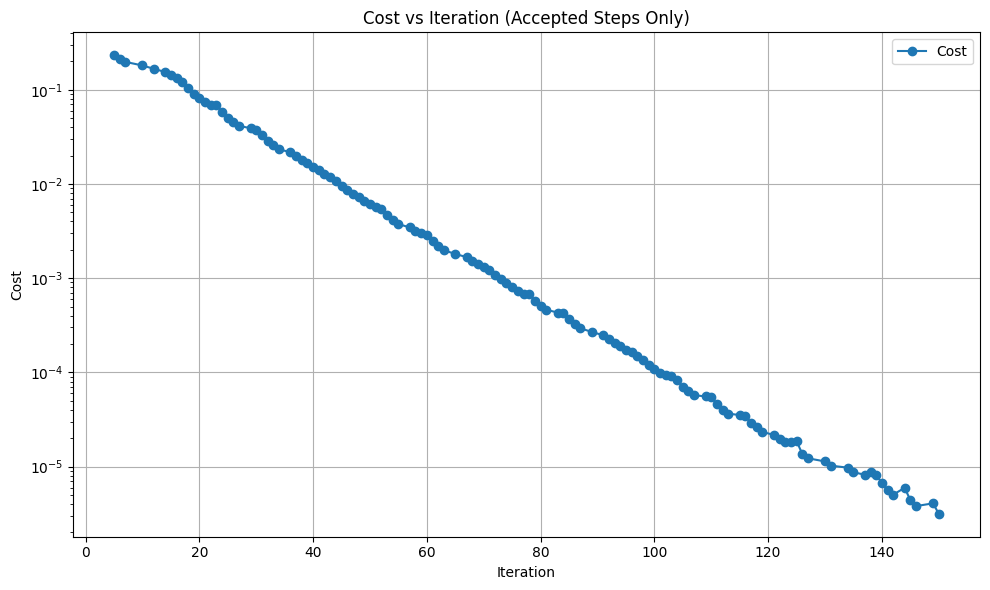

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['Cost'], label='Cost', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration (Accepted Steps Only)')
plt.yscale('log')  # Optional: Use log scale if cost varies a lot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

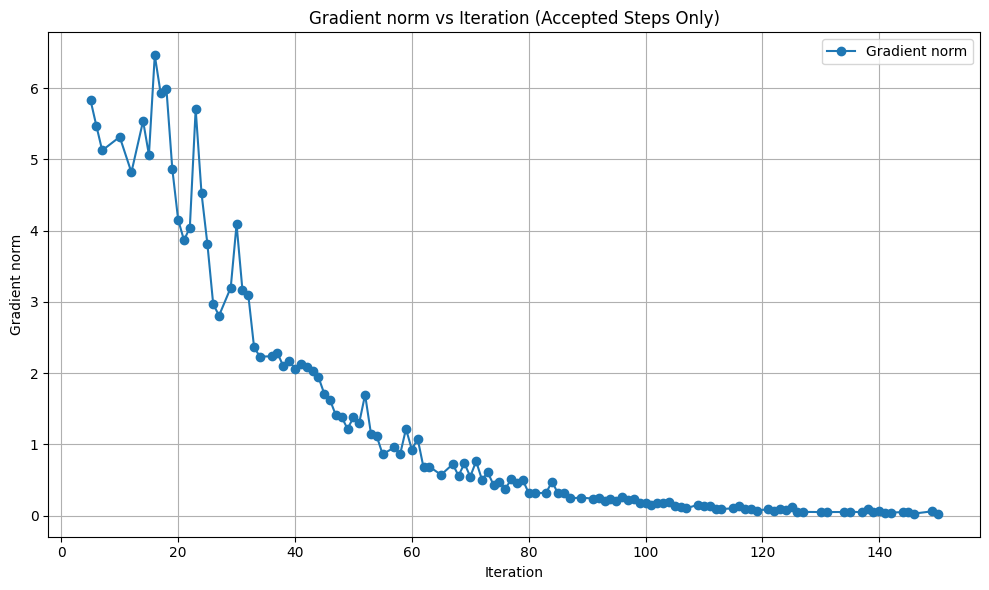

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Filter only accepted iterations
df_accepted = df[df['Status'] == 'ACCEPTED']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_accepted['Iter'], df_accepted['r_norm'], label='Gradient norm', marker='o')
# plt.plot(df_accepted['Iter'], df_accepted['New_Cost'], label='New Cost', marker='x')

plt.xlabel('Iteration')
plt.ylabel('Gradient norm')
plt.title('Gradient norm vs Iteration (Accepted Steps Only)')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()